*Для воспроизведения произведенной работы, запускать с 5 ячейки*

In [1]:
from parsing_functions import *

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# количество вакансий

num_jobs_ca = 506
num_jobs_ny = 502

## Парсинг

In [ ]:
# парсим новые вакансии

all_jobs_ca = parse_ds_jobs(location='California', jobs_number=500)
all_jobs_ny = parse_ds_jobs(location='New York State', jobs_number=500)

In [ ]:
# сохраним web-страницы

save_web_pages(pages=all_jobs_ca, path='ca_jobs/ca_job')
save_web_pages(pages=all_jobs_ny, path='ny_jobs/ny_job')

In [4]:
# создаем датафреймы

data_ca = extract_data(path='ca_jobs/ca_job_', state='California', num_pages=num_jobs_ca)
data_ny = extract_data(path='ny_jobs/ny_job_', state='New York State', num_pages=num_jobs_ny)

data = pd.concat([data_ca, data_ny]).reset_index(drop=True)

In [5]:
# сохраним датафрейм

data.to_csv('ds_vacancies.csv', index=False)

In [4]:
data.sample(5)

,title,company,apply_link,company_account,compensation,benefits,location,level,description,state
236,New Algorithms and Science Data Processing for...,National Aeronautics and Space Administration ...,https://www.indeed.com/applystart?jk=389ce614d...,https://www.indeed.com/cmp/Nasa?campaignid=mob...,96500.0,[],California,not specified,\n\n\n\n\nOrganization\n\n\n National Aero...,California
108,"Senior Data Scientist, Customer Analytics",Atlassian,https://www.indeed.com/applystart?jk=9a72c3fde...,https://www.indeed.com/cmp/Atlassian?campaigni...,145000.0,[],Mountain View,Senior,\n\n\n\nWorking at Atlassian\n\n\n\n Atlassian...,California
646,Head of Data Science,Duolingo,https://www.indeed.com/applystart?jk=fefab9226...,https://www.indeed.com/cmp/Duolingo?campaignid...,254950.0,[Paid time off],New York,not specified,\nOur mission at Duolingo is to develop the be...,New York State
931,Data Science Consultant - Health Plan & Provider,ZS,https://www.indeed.com/applystart?jk=c084ef410...,https://www.indeed.com/cmp/Zs-Associates?campa...,131500.0,"[Dental insurance, Health insurance, Life insu...",New York,not specified,\n : \n \n ZS is a professional services firm ...,New York State
889,"Senior API Engineer, Data Science",Medidata Solutions,https://www.indeed.com/applystart?jk=2e68994a0...,https://www.indeed.com/cmp/Medidata-Solutions?...,133500.0,[Opportunities for advancement],New York,not specified,\n\n\n\nRequisition ID \n529189\n\n\n\n\n\n\n\...,New York State


In [164]:
print(f"В финальном датафремй {data.shape[0]} объектов и {data.shape[1]} столбцов.")

В финальном датафремй 1008 объектов и 12 столбцов.


### Описание признаков:

- title - заголовок вакансии;
- company - название компании;
- apply_link - ссылка для отклика;
- company_account - ссылка на личную страницу компании на indeed.com;
- compensation - заработная плата в год;
- benefits - преимущества/бонусы от компании;
- location - город, в котором размещена вакансия;
- level - уровень должности;
- description - описание вакансии;
- state - штат, в котором размещена вакансия.

## EDA

### State

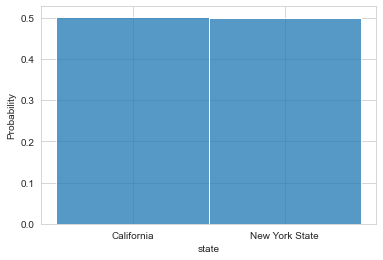

In [251]:
sns.histplot(data['state'], stat='probability')
plt.show()

Распределение по штатам одинаковое.

### Company

In [7]:
sns.set_style('whitegrid')

In [8]:
print(f"В датасете {data['company'].nunique()} компаний.")

В датасете 518 компаний.


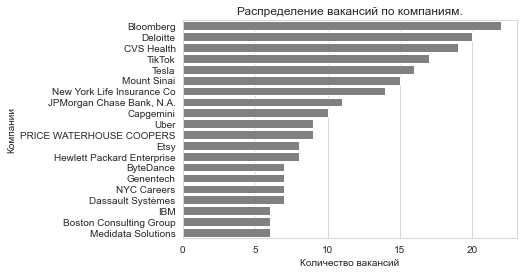

In [10]:
top20_companies = data['company'].value_counts().head(20)

sns.barplot(y=top20_companies.index,
            x=top20_companies.values,
            orient='h',
            color='gray')
plt.title('Распределение вакансий по компаниям.')
plt.xlabel('Количество вакансий')
plt.ylabel('Компании')
plt.show()

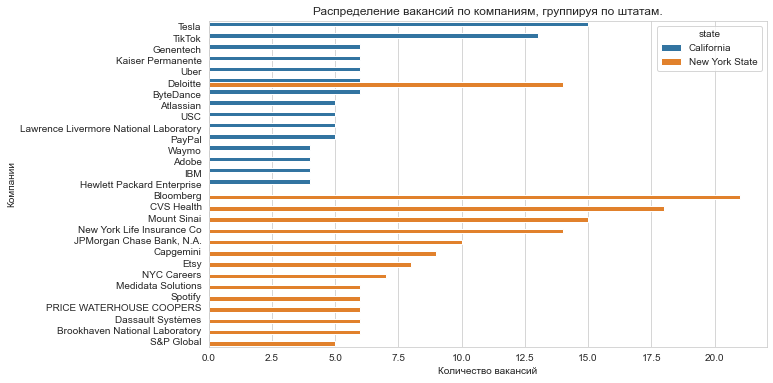

In [11]:
# распределение вакансий, группируя по штатам

companies_dist = data.groupby('state').apply(
    lambda x: x['company'].value_counts().head(15)
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=companies_dist,
            y='level_1',
            x='company',
            hue='state')
plt.xlabel('Количество вакансий')
plt.ylabel('Компании')
plt.title('Распределение вакансий по компаниям, группируя по штатам.')
plt.show()

Больше всего вакансий от:
- Bloomberg;
- Deloitte;
- CVS Health;
- TikTok;
- Tesla.

А также только **Deloitte** имеет вакансии в обоих штатах.

### Location

In [12]:
print(f"В датасете {data['location'].nunique()} городов.")

В датасете 115 городов.


In [163]:
data.groupby('state').apply(lambda x: x['location'].nunique())

state
California        74
New York State    41
dtype: int64

- В Калифорнии представлено почти в 2 раза больше городов, чем в Нью-Йорке

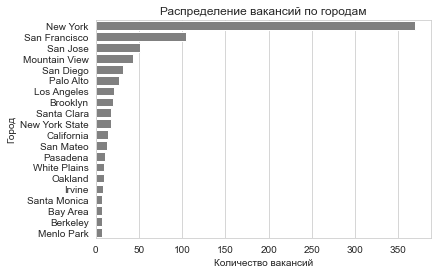

In [14]:
# распределение вакансий по городам

top20_loc = data['location'].value_counts().head(20)

sns.barplot(y=top20_loc.index,
            x=top20_loc.values, orient='h', color='gray')
plt.ylabel('Город')
plt.xlabel('Количество вакансий')
plt.title('Распределение вакансий по городам')
plt.show()

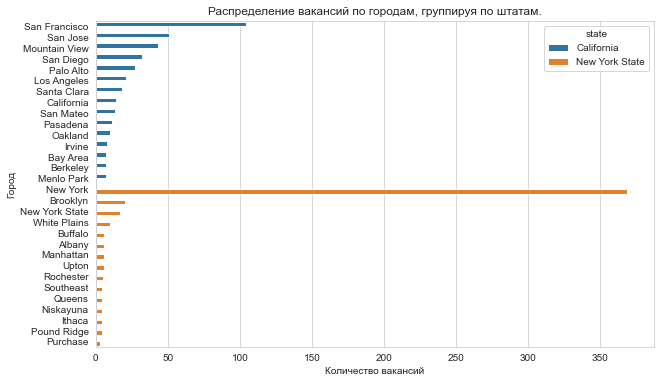

In [15]:
# распределение городов, группируя по штатам
locations_dist = data.groupby('state').apply(
    lambda x: x['location'].value_counts().head(15)
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=locations_dist,
             y='level_1',
             x='location',
             hue='state')
plt.xlabel('Количество вакансий')
plt.ylabel('Город')
plt.title('Распределение вакансий по городам, группируя по штатам.')
plt.show()

- Подавляющее большинство вакансий расположено в **Нью-Йорке**;
- В Калифорнии распределение вакансий по городам более равномерное.

### Compensation

In [96]:
# количество вакансий в каждом городе

data['loc_prob'] = data.groupby('location')['title'].transform(
    lambda x: len(x)
)

# отберем топ-10 городов по медианной зарплате, среди городов, в которых есть минимум 5 вакансий

comp_by_loc = data[data['loc_prob'] >= 5].groupby(
    ['state', 'location']
)['compensation'].median().reset_index().sort_values(by='compensation', ascending=False).groupby('state').apply(
    lambda x: x[:10]
)

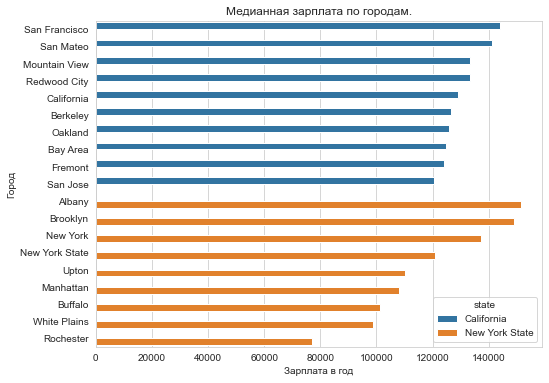

In [97]:
# посмотрим на медиану зарплат по городам

plt.figure(figsize=(8, 6))
sns.barplot(data=comp_by_loc,
             x='compensation',
             y='location',
             hue='state')
plt.xlabel('Зарплата в год')
plt.ylabel('Город')
plt.title('Медианная зарплата по городам.')
plt.show()

- В Бруклине и Албани самая высокая медианная зарплата среди обоих штатов;
- В калифорнии медианная зарплата убывает более плавно;
- в топ 10 городов Калифорнии, в ни одном городе нет зп ниже $120000, тогда как в Нью-Йорке таких городов целых 5.

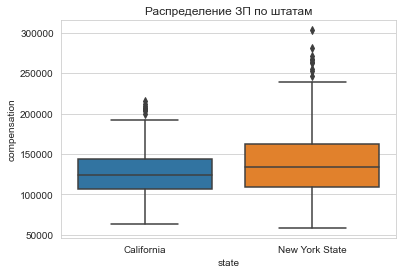

In [98]:
sns.boxplot(data=data,
            y='compensation',
            x='state')
plt.title('Распределение ЗП по штатам')
plt.show()

In [155]:
data.groupby('state')['compensation'].median()

state
California        123500.0
New York State    133500.0
Name: compensation, dtype: float64

In [160]:
perc_diff = 1 - data[data['state'] == 'California']['compensation'].median() /\
data[data['state'] == 'New York State']['compensation'].median()

print(f"В Калифорнии ЗП ниже чем в Нью-Йорке на {np.round(perc_diff * 100, 2)}%")

В Калифорнии ЗП ниже чем в Нью-Йорке на 7.49%


- Не смотря на то, что по предыдущему графику кажется, что в Калифорнии ЗП выше, на графике boxplot мы видим, что на самом деле в Нью-Йорке и медиана ЗП выше (на 7.49%), и межквартильный размах выше, чем в Калифорнии;
- Помимо этого, в Нью-Йорке больше аномально-высоких зарплат, более того, их значения принимают гораздо более-высокие значения, чем в Калифорнии.

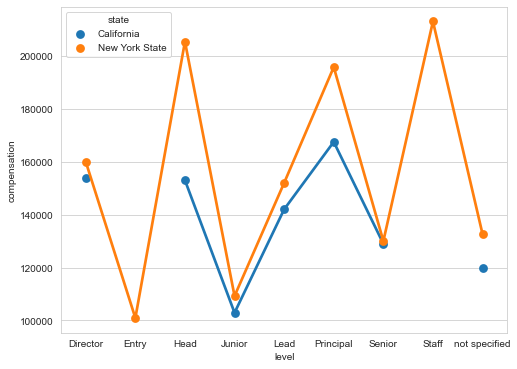

In [93]:
# медиана ЗП по уровням должности

seniority_compensation = data.groupby(['level', 'state'])['compensation'].median().reset_index()

plt.figure(figsize=(8, 6))
sns.pointplot(data=seniority_compensation, x='level', y='compensation', hue='state')
plt.show()

- по уровням должности медиана ЗП в Нью-Йорке, также, выше по всем уровням, нежели в Калифорнии.

### Description

Посмотрим не самые часто встречающиеся слова в описании вакансий

In [99]:
# приведем описание вакансий к нижнему регистру
data['new_description'] = data['description'].transform(lambda x: x.lower())

# символы, которые не будем учитывать
unuse_symbols = string.punctuation + '\n\xa0«»\t—…' + '1234567890'

# удалим ненужные символы
data['new_description'] = data['new_description'].apply(
    lambda x: ''.join([i for i in x if i not in unuse_symbols])
)

# стоп слова
en_stopwords = stopwords.words("english") + ['job', 'type', 'description', 'experience', 'work']
en_stopwords = set(en_stopwords) | set(STOP_WORDS)

text = ' '.join([i for i in data['new_description']])

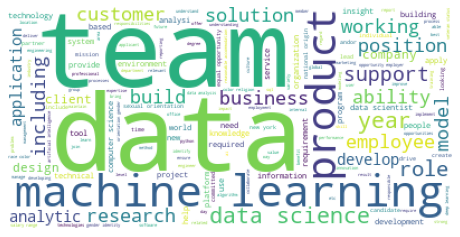

In [100]:
# генерация облака слов
wordcloud = WordCloud(stopwords=en_stopwords,
                      background_color="white").generate(text)
# визуализация
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Никаких удивительных слов мы здесь не встретили, столпом стоят **data** и **team**

### Benefits

Посмотри какие преимущества чаще предоставляются компаниями

In [127]:
def count_words(list_of_words: list, dictionary: dict):
    """
    Функция считает вхождение слов/словосочетаний в массив.

    :param list_of_words: list со словами/словосочетаниями
    :param dictionary: dict словарь для хранение подсчета слов/словосочетаний
    :return: None
    """
    for word in list_of_words:
        if word in dictionary:
            dictionary[word] += 1
        else:
            dictionary[word] = 1

In [130]:
# считаем преимущества для каждого штата
count_benefits_ca ={}
count_benefits_ny ={}

for state in data['state'].unique():
    if state == 'California':
        data[data['state'] == state]['benefits'].apply(lambda x: count_words(x, count_benefits_ca))
    else:
        data[data['state'] == state]['benefits'].apply(lambda x: count_words(x, count_benefits_ny))

# трансформируем словари в pd.DataFrame для более удобной работы
count_benefits_ca = pd.DataFrame({
    'benefit': count_benefits_ca.keys(),
    'count': count_benefits_ca.values(),
    'state': 'California'
})

count_benefits_ny = pd.DataFrame({
    'benefit': count_benefits_ny.keys(),
    'count': count_benefits_ny.values(),
    'state': 'New York State'
})

# соединяем датафреймы
count_benefits = pd.concat([count_benefits_ca, count_benefits_ny])

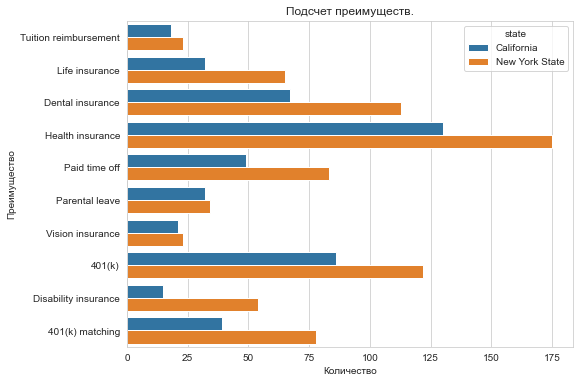

In [154]:
# суммируем количество вхождения преимуществ
count_benefits['sum_by_state'] = count_benefits.groupby('benefit')['count'].transform(lambda x: x.sum())

# посмотрим на медиану зарплат по городам

plt.figure(figsize=(8, 6))
sns.barplot(data=count_benefits[count_benefits['benefit'].isin(count_benefits.sort_values(by='sum_by_state', ascending=False)['benefit'][:20])],
            x='count',
            y='benefit',
            hue='state')
plt.xlabel('Количество')
plt.ylabel('Преимущество')
plt.title('Подсчет преимуществ.')
plt.show()

- здесь ничего удивительного не видим, в топ 10 преимуществ, предоставляемых компаниями в обоих штатах, в основном различные меры социальной поддержки.

## Вывод

Сравнив по ~500 вакансий из Калифорнии и Нью-Йорка(штат), мы увидели, что медиана зарплат среди Data Scientist'ов незначительно
выше в Нью-Йорке (на 7.49%), и вместе с тем, в этом штате чаще встречаются и вакансии с аномально-высокими зарплатами. Помимо этого стоимость жизни в Калифорнии выше на 5.3%, чем в Нью-Йорке [(Ссылка на источник)](https://www.mylifeelsewhere.com/cost-of-living/new-york-usa/california-usa). Поэтому, опираясь на данные в опубликованных вакансиях на [Indeed](https://www.indeed.com/), выгоднее искать работу в штате Нью-Йорк.
